# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 3rd, 2025 at 23:55. Hand in your files via DTU Learn. 

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import calplot
import numpy as np
import datetime

#Loading data from a file
crime_data = pd.read_csv('merged_data_datetime_2025.csv')
crime_data["DateTime"] = pd.to_datetime(crime_data["DateTime"])
# This data contains the following columns:
# ['Category', 'PdDistrict', 'Longitude', 'Latitude', 'DateTime','TimeOfDay', 'DayOfWeek', 'DayOfMonth', 'Month', 'Year']
# Note that the 'DateTime' column is a datetime object, and the Category includes an "other crime" category.

## Part 1

From week 1's exercise, I'd like you to complete the "*Exercise 3*: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.

**IMPORTANT**: FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.

> *Exercise 3*: Temporal patterns.
> * To start off easily, let's count the number of crimes per year:
>     * What is the year with most crimes? 
>     * What is the year with the fewest crimes?.

In [2]:
print(f"The year with the most crime is {crime_data.groupby('Year').size().idxmax()} with {crime_data.groupby('Year').size().max()} crimes")
print(f"The year with the fewest crime is {crime_data.groupby('Year').size().idxmin()} with {crime_data.groupby('Year').size().min()} crimes ") 
# makes sense since the year is not over 
print(f"The year with the fewest crime that is not 2025 is {crime_data[crime_data['Year']!=2025].groupby('Year').size().idxmin()} with {crime_data[crime_data['Year']!=2025].groupby('Year').size().min()} crimes" )
 # makes sense since the year is not over 

The year with the most crime is 2015 with 151459 crimes
The year with the fewest crime is 2025 with 12449 crimes 
The year with the fewest crime that is not 2025 is 2024 with 101677 crimes


> * Create a barplot of crimes-per-year (years on the $x$-axis, crime-counts on the $y$-axis).


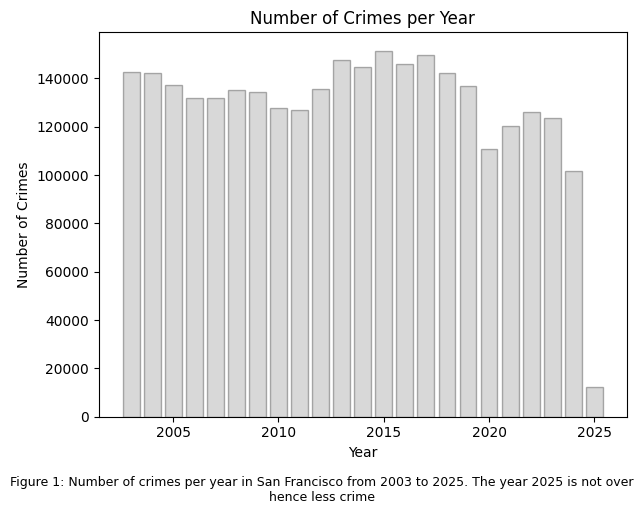

In [3]:
plt.bar(crime_data.groupby('Year').size().index, crime_data.groupby('Year').size().values
        , edgecolor='black', facecolor='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.figtext(0.5, -0.05, 'Figure 1: Number of crimes per year in San Francisco from 2003 to 2025. The year 2025 is not over hence less crime', wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()


> * Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2025.
> 

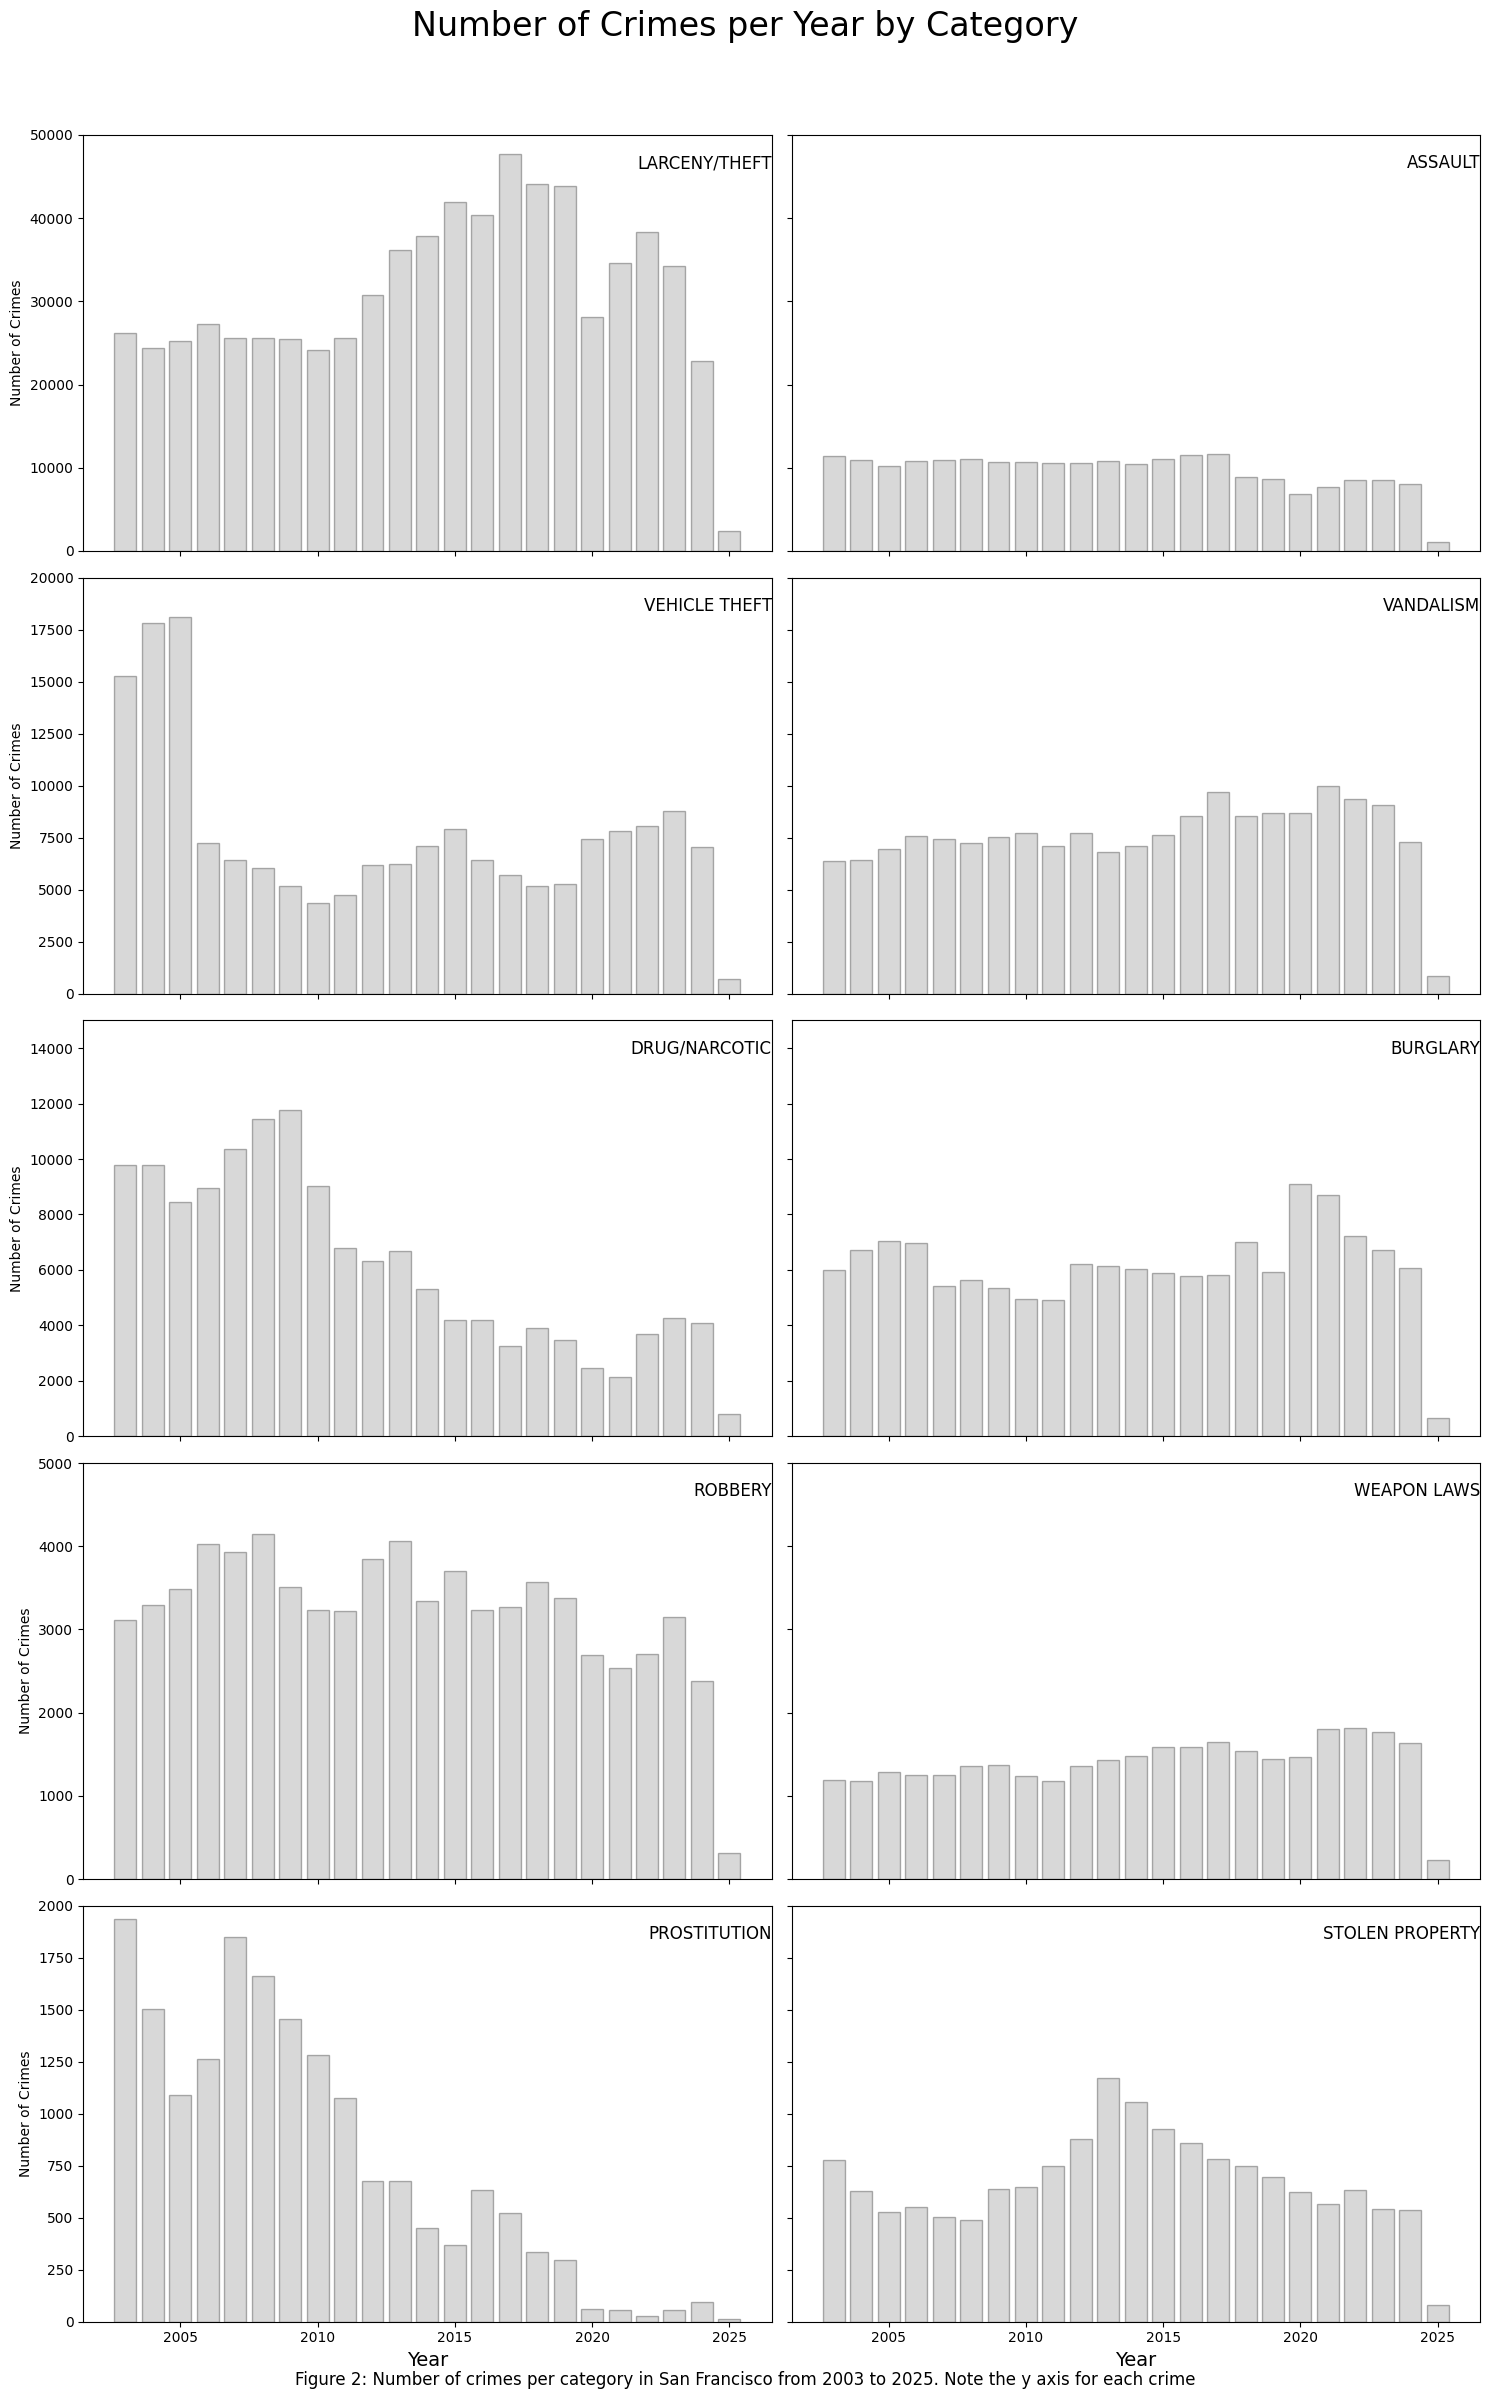

In [4]:
crime_categories = crime_data["Category"].value_counts().index.tolist()
crime_categories.remove("OTHER OFFENSES")

dict_crimes_year = {} 
for year in crime_data["Year"].unique():
    dict_crimes_year[year] = [((crime_data[crime_data["Year"] == year]["Category"] == cat).sum(), cat) for cat in crime_categories]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
fig.suptitle("Number of Crimes per Year by Category", fontsize=24, y=0.95)

ylims = [50000,50000,20000,20000,15000,15000,5000,5000,2000,2000]

for i, (ax, crime) in enumerate(zip(axes.flatten(), crime_categories)):
    ax.bar(dict_crimes_year.keys(), [sum([x[0] for x in dict_crimes_year[year] if x[1] == crime]) for year in dict_crimes_year.keys()],
           edgecolor='black', facecolor='gray', alpha=0.3)

    ax.set_ylim(0, ylims[i]) 

    ax.set_title(crime, loc='right', y=0.9)
    if i % 2 == 0:
        ax.set_ylabel("Number of Crimes")
    else:
        ax.set_yticklabels([])
    if i == len(axes.flatten()) - 2 or i == len(axes.flatten()) - 1:
        ax.set_xlabel("Year", fontsize=14)
    else:
        ax.set_xticklabels([])
plt.figtext(0.5, 0, 'Figure 2: Number of crimes per category in San Francisco from 2003 to 2025. Note each row share the same y axis', wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

## Part 2

Next, I would like you to answer some of the questions related to the videos shown during week 2. Specifically, I would like you to

* Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")
* Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.


> *Excercise:* Questions for the lecture. 
> 
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?

Data: is the thing you are measuring. for this example it the location.

Metadata: is the context/environment of the data collection. For the gps example it can be the  timestamp, device type or the 3d rendering of the trip.

> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

I agree with Sune, the human eye is excellent and finding patterns which makes it great at data analysis, as an example, the human eye can estimate the trend of a graph, or clustering of points. However, it is only good at estimating, it can not give any precise information about data. as an example, if data has high variance (or noise), then the human eye can have a hard time understating the trends.

> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

The paradox illustrates that individual groups of data can show a trend in one direction but the whole data show a trend in the opposite direction. As an example, each country may try to slightly reduce CO2 emissions, but on a large graph it may seem that it is increasing due to differences in population/economy.    

> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.
>

Exploring: find patterns and trends of data. "how does x change over time"
Explanation: illustrate and communicate data and results of experiments. "why did x change over time" think of seeing an upward trend until covid then it decrease. 


> *Exercise:* Nice plots. 
>
> * Create a list of 10 rules for nice plots based on the video.

- Group plots together
- Use space efficiently 
- LABEL plot x,y,legend,title
- check of axes values make sense and range between each tick is not random
- check if axis start at 0 
- make sure the axis are comparable for each axes in subplots or mention in caption
- do not show redundant information 
- do not do many colors for no reason
- do not make graphs that are too cluttered
- Fonts and captions are important



## Part 3

We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "*Exercise*: Other cool ways to plot temporal data" (the one where we explore alternatives to bar-plots, such as calendar plots, for plotting temporal data).

In the exercise, i ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.


> *Exercise:* Other cool ways to plot temporal data. I am going to introduce three different plot-types. Then your job is to choose a part of the crime-data that you care about - and plot it using these new ways of visualizing data. <font color="grey">For this one, you may use the full power of your LLM! Yes, I'm serious. Go nuts and see if you can get these plots going by fully relying on code generated by your LLM</font>. In case you want to use the *old ways* (that's of course always OK), I've included links and tips. 
>
>I recommend that you choose a different part of the crime-data for each plot-type.
> * Calendar plots. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.


C:\Users\musti\AppData\Local\Temp\ipykernel_5776\3111401200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_data["date"] = drugs_data["DateTime"].dt.date
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfon

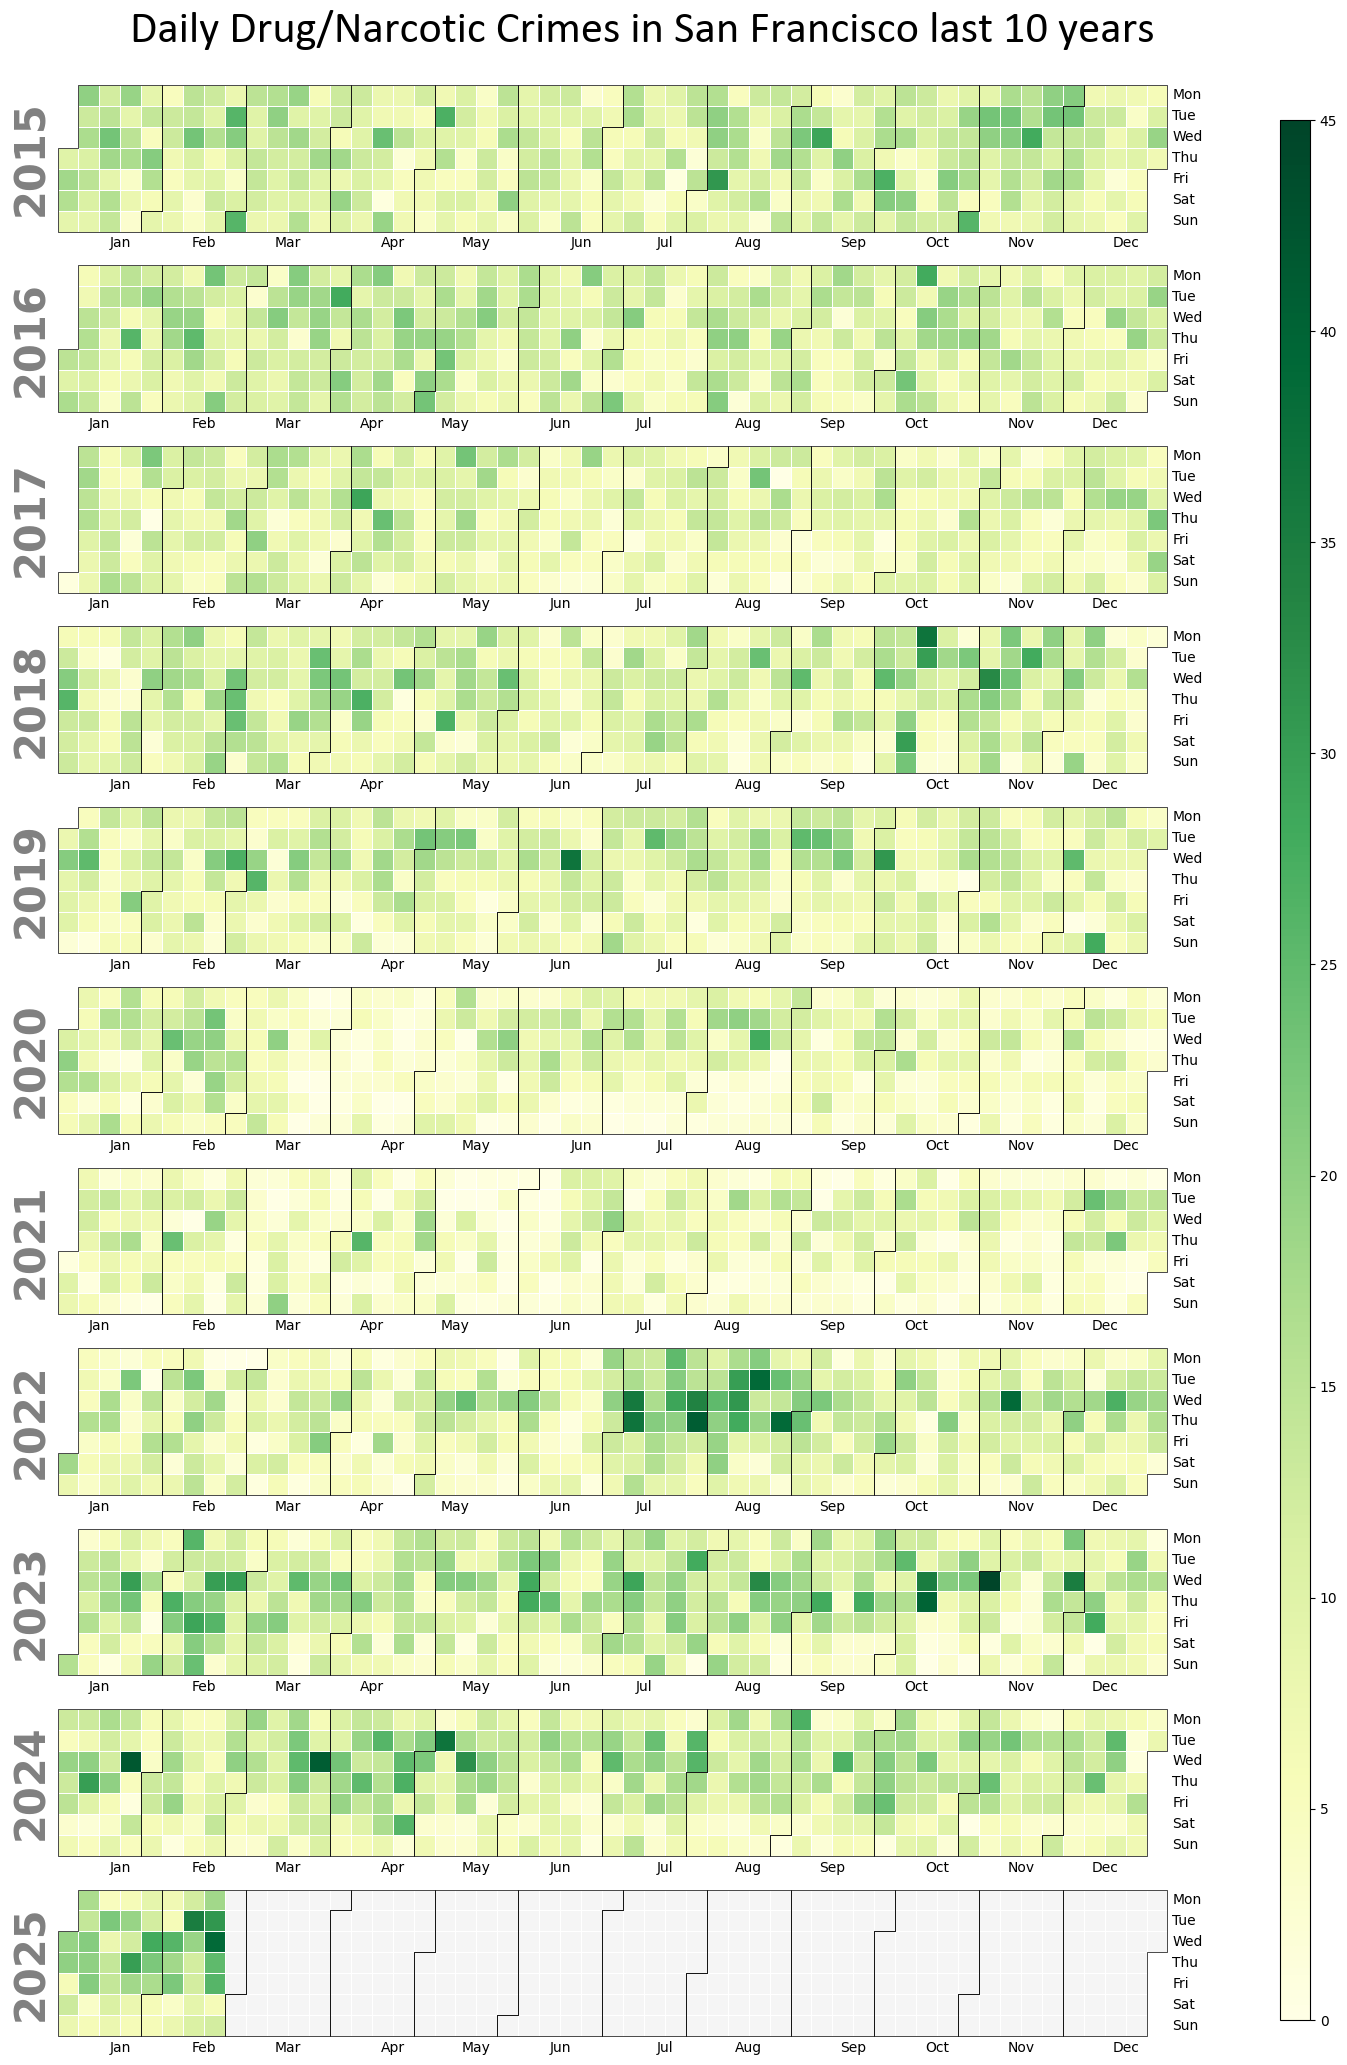

In [5]:
drugs_data = crime_data[(crime_data["Category"] == "DRUG/NARCOTIC")& (crime_data["Year"] >= 2015)]

# Count drug crimes per day
drugs_data["date"] = drugs_data["DateTime"].dt.date
events = pd.Series(drugs_data.groupby("date").size().values, 
                  index=pd.to_datetime(drugs_data.groupby("date").size().index))

calplot.calplot(
    events,
    figsize=(15, 20),
    cmap='YlGn',
    suptitle="Daily Drug/Narcotic Crimes in San Francisco last 10 years",
    suptitle_kws={'fontsize': 32,'font' : 'calibri'},
    daylabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    dayticks=True,
    linewidth=0.5,
    colorbar=True,
    tight_layout=True,
    edgecolor='black',
)
plt.show()  # Make sure the plot is displayed

> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).



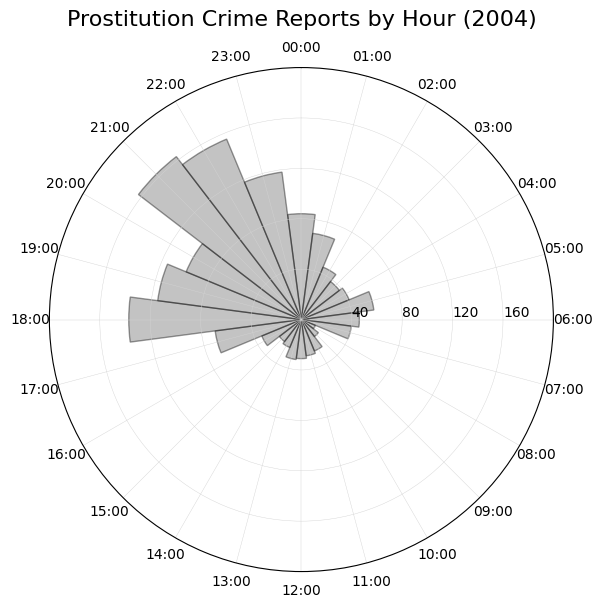

In [6]:
prostitution_data = crime_data[(crime_data["Category"] == "PROSTITUTION") & 
                               (crime_data["Year"] == 2004)]

hourly_counts = prostitution_data.groupby('TimeOfDay').size()
hourly_counts = hourly_counts.sort_index()
all_hours = pd.Series(index=range(24), data=0)

# Get the maximum value for proper scaling
max_count = hourly_counts.max()
max_tick = (max_count // 40 + 1) * 40 

# Create polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Set the angle to match hour of the day
theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)
width = 2 * np.pi / 24

# Plot bars
bars = ax.bar(
    theta, 
    hourly_counts.values, 
    width=width, 
    bottom=0.0,
    alpha=0.4,
    edgecolor='black',
    color='dimgray',
)

ax.grid( color='lightgray', linestyle='-', linewidth=0.3, alpha=1)  # Then enable only y-axis (radial) grid

# Set r-ticks with spacing of 40
ax.set_rticks(np.arange(0, max_tick + 40, 40)[1:-1] )
ax.set_rlabel_position(90)
ax.set_rmax(max_tick)

# Set the direction of the zero hour to the top and clockwise rotation
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.set_xticks(theta)
hour_labels = [f"{i:02d}:00" for i in range(24)]
ax.set_xticklabels(hour_labels, fontsize=10)

plt.title('Prostitution Crime Reports by Hour (2004)', fontsize=16, pad=30)
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.22)

> * Reflection (<font color="grey">no LLM help here</font>): What did you learn from using LLM's to simply solve everything in this exercise (in contrast to the previous ones).

For the calender exercise, it was basically useless, I had to do it the old fashion way. As for the polar, it is good at creating the foundation, but no matter how hard i tried it will never be as good enough, either too cluttered, too many colors or multiple text on each other.   

## Part 4

From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to **both** complete "*Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "*Excercise Part 2*". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.


> *Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.
>
> <font color="grey"></font>
> 
> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.



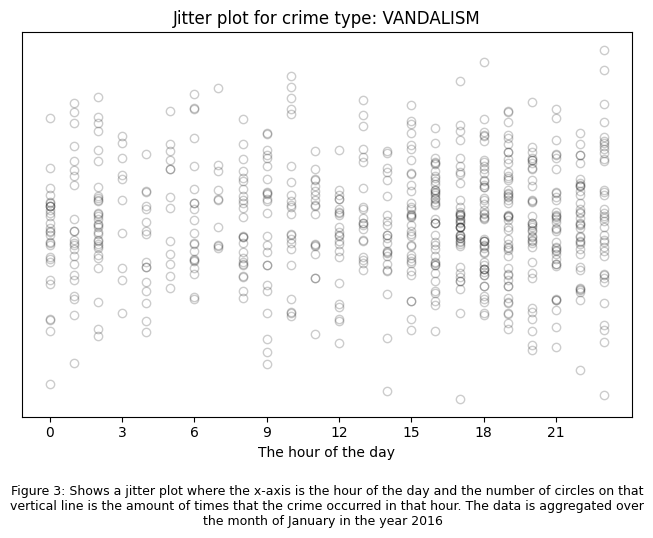

In [7]:
jitter_crime_type = "VANDALISM"
time_interval_start = datetime.datetime(2016, 1, 1, 0, 0, 0)
time_interval_end = datetime.datetime(2016, 1, 31, 23, 59, 59)
jitter_crime_data = crime_data[(crime_data["Category"] == jitter_crime_type) & 
                                (crime_data["DateTime"] >= time_interval_start) & 
                                (crime_data["DateTime"] <= time_interval_end)]

plt.plot(jitter_crime_data["TimeOfDay"], np.random.normal(0, 0.3, jitter_crime_data.shape[0]), 'ok',mfc='none' ,  alpha=0.2)
plt.xlabel("The hour of the day")
plt.yticks([])
plt.xticks(np.arange(0, 24, 3))
plt.figtext(0.5, -0.1, 'Figure 3: Shows a jitter plot where the x-axis is the hour of the day and the number of circles on that vertical line is the amount of times that the crime occurred in that hour. The data is aggregated over the month of January in the year 2016  ', wrap=True, horizontalalignment='center', fontsize=9)
plt.title("Jitter plot for crime type: " + jitter_crime_type)
plt.tight_layout()


> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 


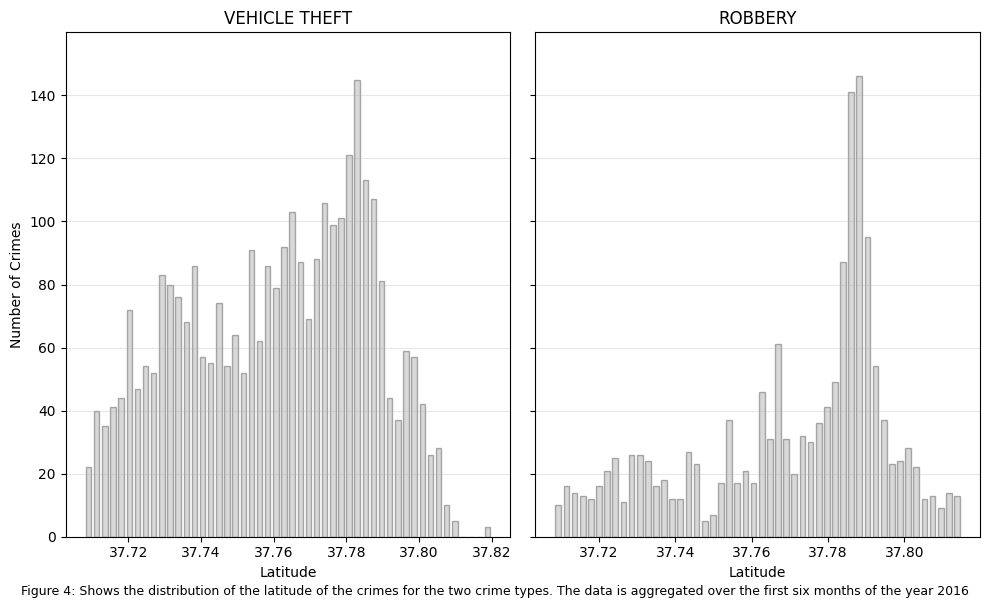

In [8]:
time_interval_start = datetime.datetime(2016, 1, 1, 0, 0, 0)
time_interval_end = datetime.datetime(2016, 6, 30, 23, 59, 59)

crime1 = "VEHICLE THEFT"
crime2 = "ROBBERY"
#print("avg lat" , [(c,np.mean(crime_data[(crime_data["Category"] == c)]["Latitude"].values)) for c in crime_categories])

lat_crime1 =  crime_data[(crime_data["Category"] == crime1)&
                         (crime_data["DateTime"] >= time_interval_start) & 
                         (crime_data["DateTime"] <= time_interval_end)]["Latitude"]

lat_crime2 =  crime_data[(crime_data["Category"] == crime2)&
                         (crime_data["DateTime"] >= time_interval_start) & 
                         (crime_data["DateTime"] <= time_interval_end)]["Latitude"]

hist1 = np.histogram(lat_crime1, bins=50)
bin_centers1 = (hist1[1][:-1] + hist1[1][1:]) / 2
hist2 = np.histogram(lat_crime2, bins=50)
bin_centers2 = (hist2[1][:-1] + hist1[1][1:]) / 2

fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(10, 6))

ax[0].bar(bin_centers1, hist1[0], width=0.0015, edgecolor='black', facecolor='gray', alpha=0.3)
ax[0].set_title(crime1)
ax[0].set_xlabel("Latitude")
ax[0].set_ylabel("Number of Crimes")
ax[0].set_ylim(0, 160)
ax[0].set_yticks(np.arange(0, 160, 20))
ax[0].grid(axis='y',alpha=0.3) 

ax[1].bar(bin_centers2, hist2[0], width=0.0015, edgecolor='black', facecolor='gray', alpha=0.3)
ax[1].set_title(crime2)
ax[1].set_xlabel("Latitude")
ax[1].set_ylim(0, 160)
ax[1].set_yticks(np.arange(0, 160, 20))
ax[1].set_yticklabels([])
ax[1].grid(axis='y',alpha=0.3) 


plt.figtext(0.5, 0, 'Figure 4: Shows the distribution of the latitude of the crimes for the two crime types. The data is aggregated over the first six months of the year 2016', wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()

> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://medium.com/towards-data-science/histograms-and-density-plots-in-python-f6bda88f5ac0). <font color="gray">Or ask your LLM what it recommends</font>.


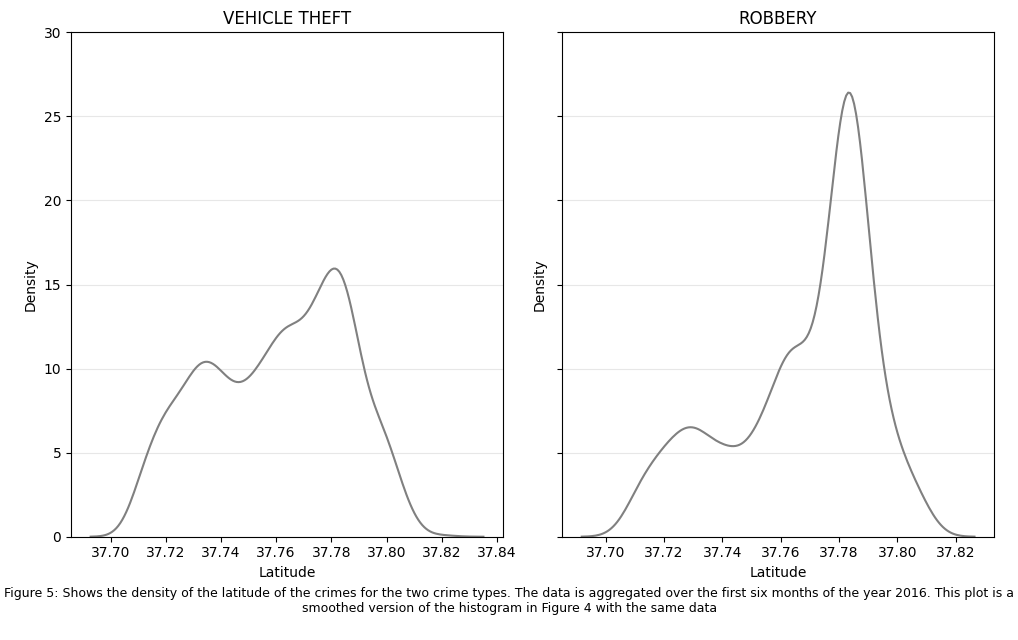

In [9]:
import seaborn as sns


fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(10, 6))
sns.kdeplot(np.array(lat_crime1.tolist(), dtype=float), ax=ax[0], color='gray')
ax[0].set_title(crime1)
ax[0].set_xlabel("Latitude")
ax[0].set_ylabel("Density")
ax[0].set_ylim(0, 30)
ax[0].grid(axis='y',alpha=0.3)

sns.kdeplot(np.array(lat_crime2.tolist(), dtype=float), ax=ax[1], color='gray')
ax[1].set_title(crime2)
ax[1].set_xlabel("Latitude")
ax[1].set_ylim(0, 30)
ax[1].set_yticklabels([])
ax[1].grid(axis='y',alpha=0.3)

plt.figtext(0.5, -0.05, """
Figure 5: Shows the density of the latitude of the crimes for the two crime types. The data is aggregated over the first six months of the year 2016. This plot is a smoothed version of the histogram in Figure 4 with the same data
""", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()


> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 
> 

Yes, the KDE smooths out histograms too much, and  it can introduce artificial curves that do not correspond to actual crime hotspots.


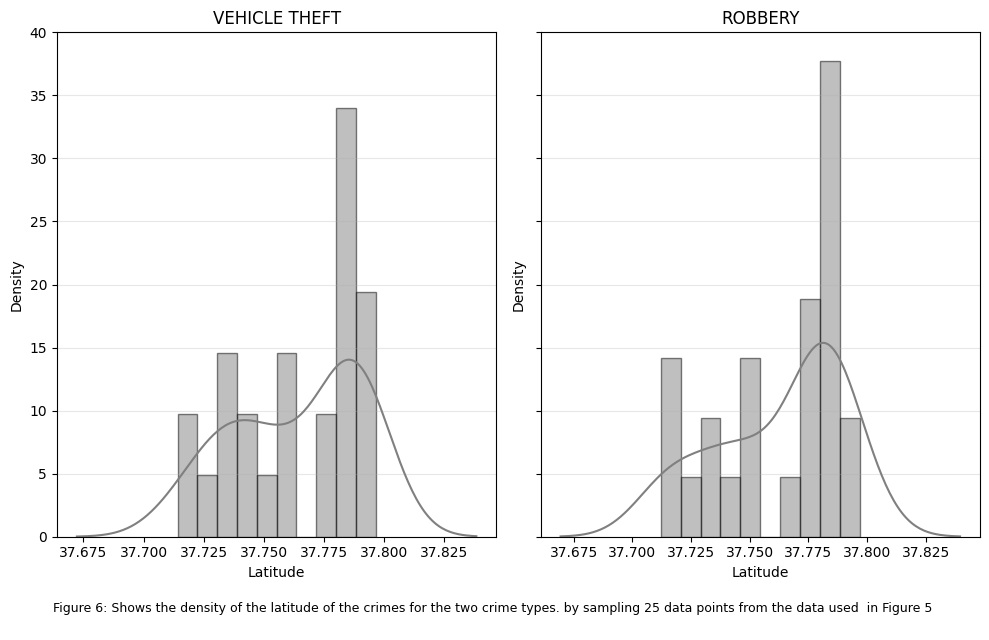

In [10]:
crime1_sample = lat_crime1.sample(25, random_state=431)
crime2_sample = lat_crime2.sample(25, random_state=431)

crime1_sample_hist = np.histogram(crime1_sample, bins=10)
crime2_sample_hist = np.histogram(crime2_sample, bins=10)


fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(10, 6))
sns.kdeplot(np.array(crime1_sample.tolist(), dtype=float), ax=ax[0], color='gray')
ax[0].hist(crime1_sample, bins=10, density=True, edgecolor='black', facecolor='gray', alpha=0.5)
ax[0].set_title(crime1)
ax[0].set_xlabel("Latitude")
ax[0].set_ylabel("Density")
ax[0].set_ylim(0, 40)
ax[0].grid(axis='y',alpha=0.3)

sns.kdeplot(np.array(crime2_sample.tolist(), dtype=float), ax=ax[1], color='gray')
ax[1].hist(crime2_sample, bins=10, density=True, edgecolor='black', facecolor='gray', alpha=0.5)
ax[1].set_title(crime2)
ax[1].set_xlabel("Latitude")
ax[1].set_ylim(0, 40)
ax[1].set_yticklabels([])
ax[1].grid(axis='y',alpha=0.3)

plt.figtext(0.5, -0.05, """
Figure 6: Shows the density of the latitude of the crimes for the two crime types. by sampling 25 data points from the data used  in Figure 5 
""", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()


> *Excercise Part 2*:
>
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.    
>   * **Hint:** Take a look at the `scipy.stats.probplot` function. 

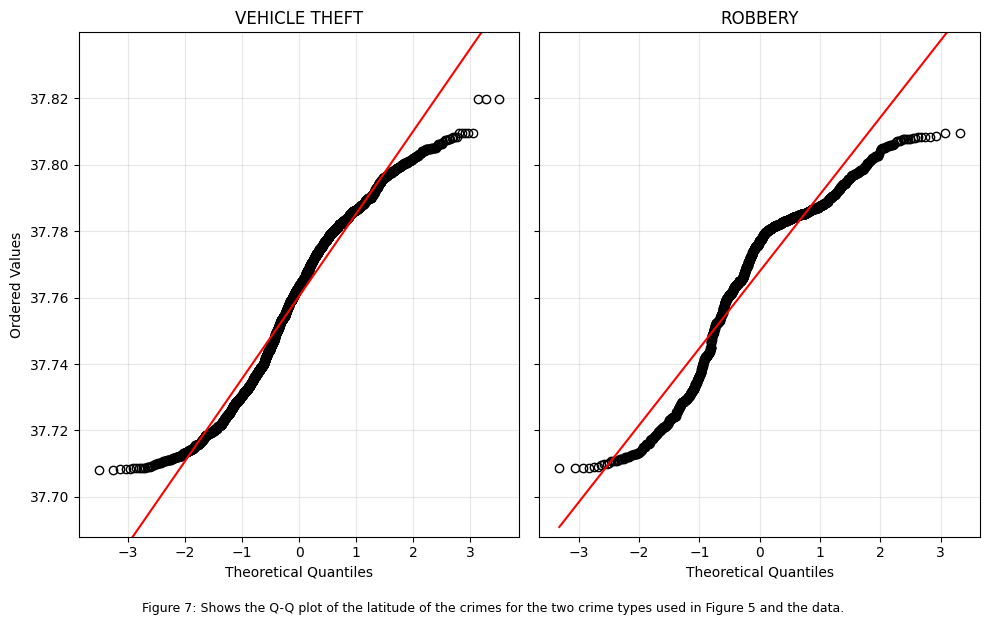

In [11]:
from scipy.stats import probplot

lms = (min(lat_crime1.min(), lat_crime2.min())-0.02, max(lat_crime1.max(), lat_crime2.max())+0.02)



fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(10, 6))

res1 = probplot(lat_crime1, plot=ax[0])
ax[0].get_lines()[0].set_markerfacecolor('None')
ax[0].get_lines()[0].set_markeredgecolor('black')
ax[0].set_title(crime1)
ax[0].set_xlabel("Theoretical Quantiles")
ax[0].set_ylabel("Ordered Values")
ax[0].set_ylim(lms)
ax[0].grid("y",alpha=0.3)   

res2 = probplot(lat_crime2, plot=ax[1])
ax[1].get_lines()[0].set_markerfacecolor('None')
ax[1].get_lines()[0].set_markeredgecolor('black')
ax[1].set_title(crime2)
ax[1].set_xlabel("Theoretical Quantiles")
ax[1].set_ylim(lms)
ax[1].set_yticklabels([])
ax[1].set_ylabel("")
ax[1].grid("y",alpha=0.3)   

plt.figtext(0.5, -0.05, """
Figure 7: Shows the Q-Q plot of the latitude of the crimes for the two crime types used in Figure 5 and the data. 
""", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()


> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 10 focus crimes defined previously.
>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all the 10 different focus crimes side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). <font color="gray">It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!</font>.
>   * What does this plot reveal that you can't see in the plots from last time?


Text(-0.5, 0.05, 'Figure 8: Boxplots of the daily crime counts for each category in San Francisco from 2003 to 2025')

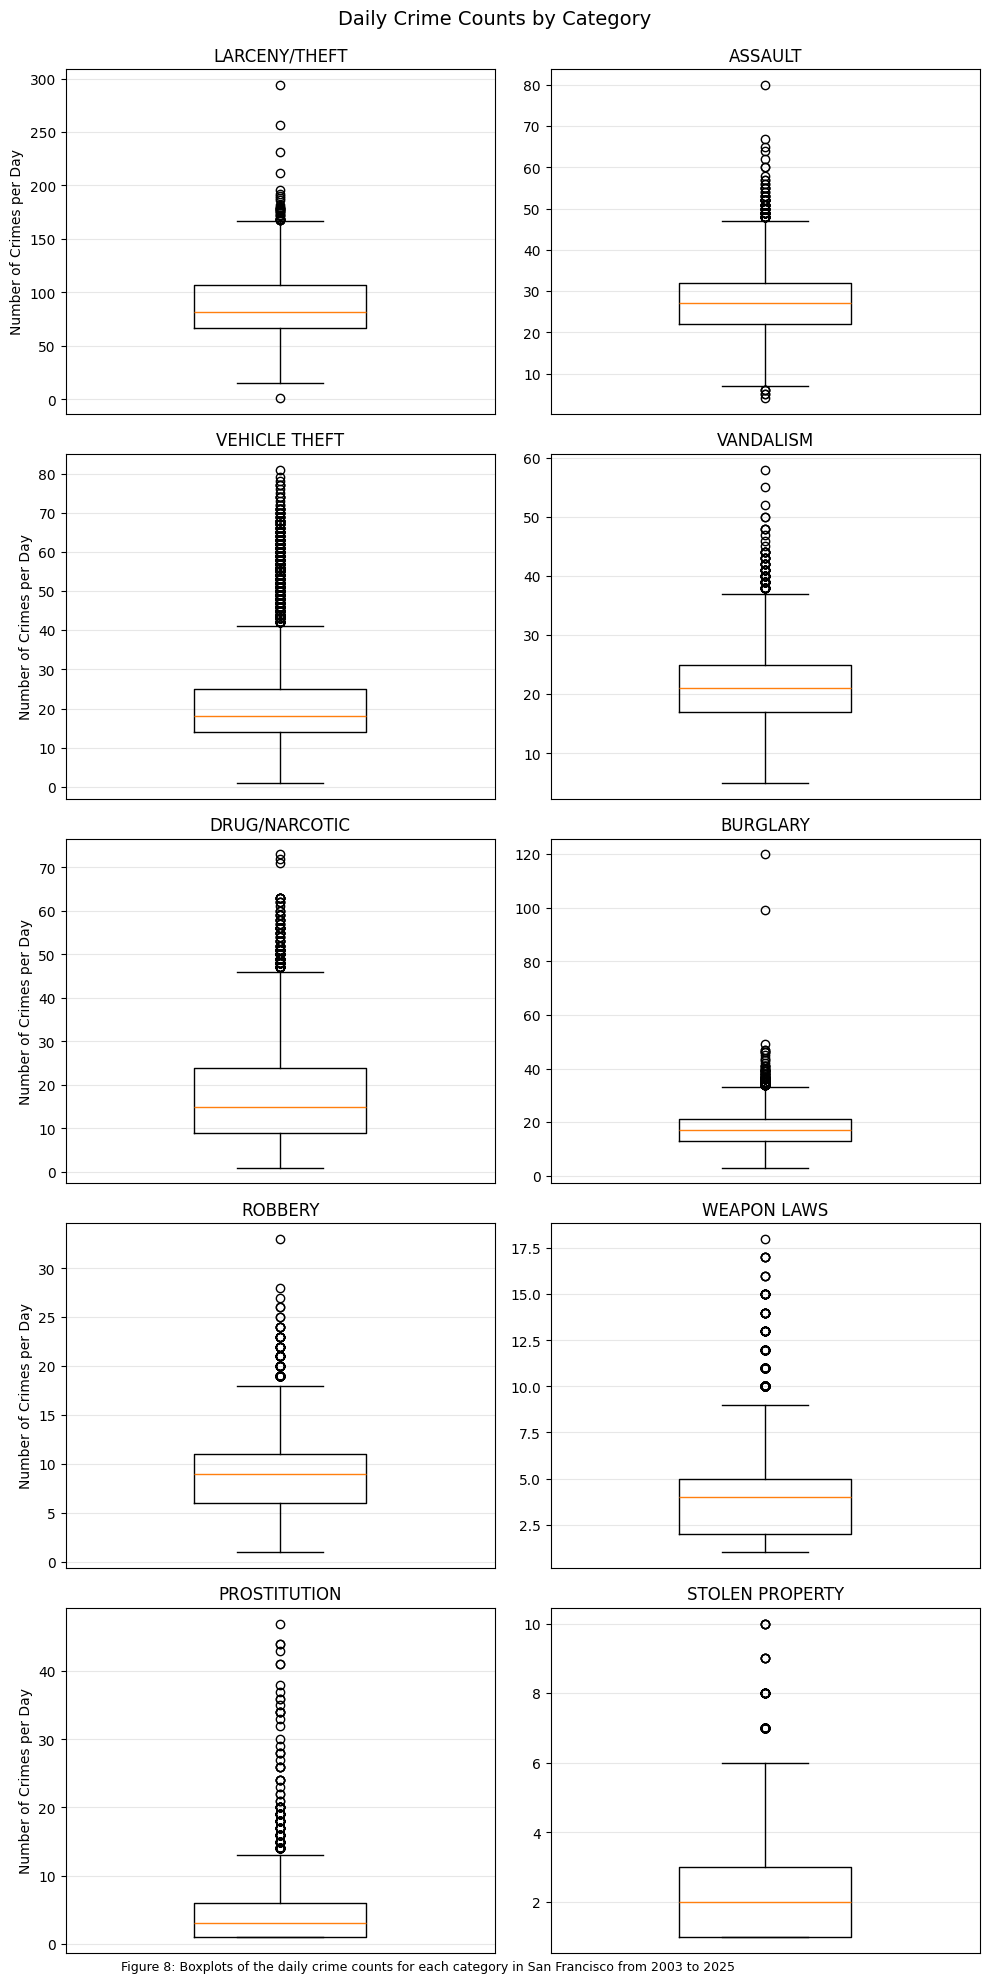

In [12]:
crime_data["Date"] = crime_data["DateTime"].dt.date

fig, ax = plt.subplots(ncols=2,nrows=5,figsize=(10, 20))
for i, (crime,ax) in enumerate(zip(crime_categories,ax.flatten())):
    daily_counts = crime_data[crime_data["Category"] == crime].groupby("Date").size()    
    ax.boxplot(daily_counts, widths=0.4)
    ax.set_title(crime)
    ax.grid(axis='y',alpha=0.3)
    ax.set_xticks([])
    if i % 2 == 0:
        ax.set_ylabel("Number of Crimes per Day")
plt.tight_layout()
fig.suptitle('Daily Crime Counts by Category', fontsize=14)
plt.subplots_adjust(top=0.95)
plt.text(-0.5, 0.05, 'Figure 8: Boxplots of the daily crime counts for each category in San Francisco from 2003 to 2025', fontsize=9)



> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?  

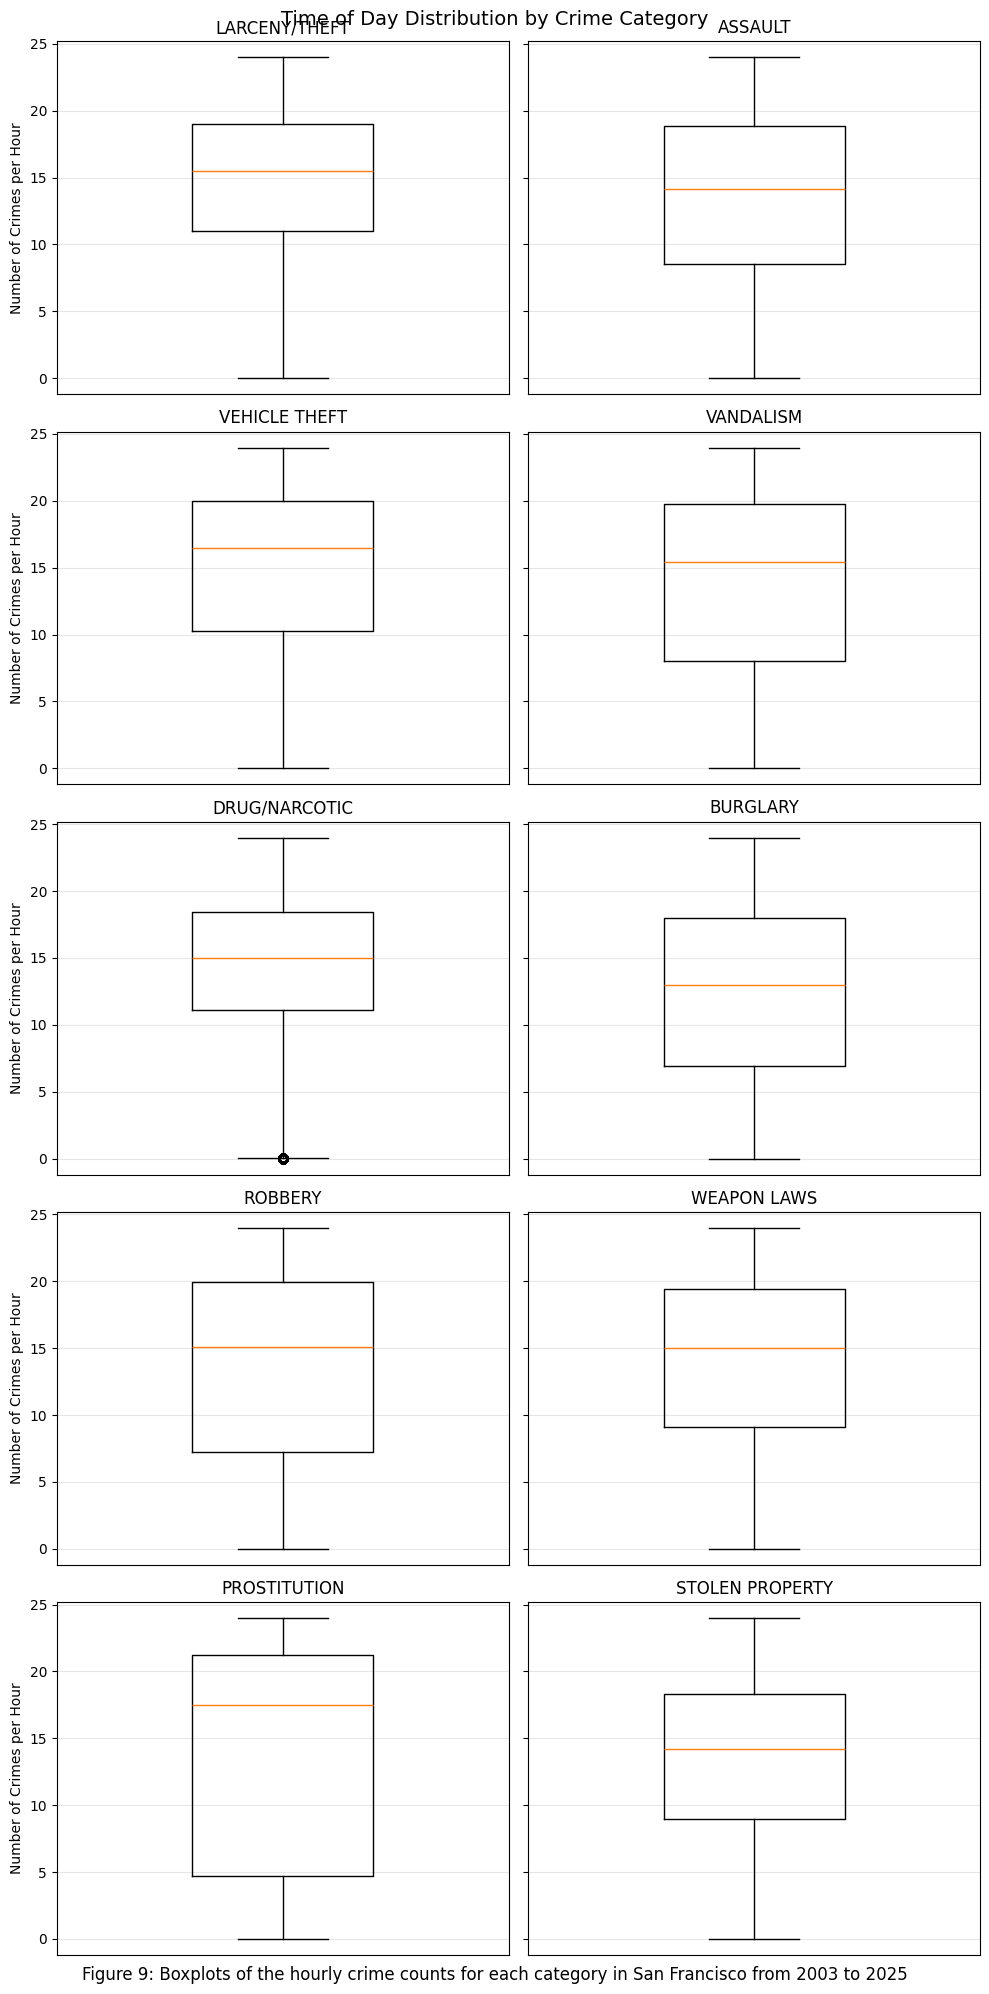

In [13]:
crime_data["Time"] = crime_data["DateTime"].dt.hour + crime_data["DateTime"].dt.minute/60
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
fig.suptitle('Time of Day Distribution by Crime Category', fontsize=14)
for i, (crime,ax) in enumerate(zip(crime_categories,ax.flatten())):
    crime_time = crime_data[crime_data["Category"] == crime] ["Time"]
    ax.boxplot(crime_time, widths=0.4)
    ax.set_title(crime)
    ax.grid(axis='y',alpha=0.3)
    ax.set_xticks([])
    if i % 2 == 0:
        ax.set_ylabel("Number of Crimes per Hour")
    else:
        ax.set_yticklabels([])
plt.figtext(0.5, -0.005, 'Figure 9: Boxplots of the hourly crime counts for each category in San Francisco from 2003 to 2025', fontsize=12, ha='center')
plt.subplots_adjust(top=0.95)
plt.tight_layout()  


## Part 5

Finally, I'd like you to work on the exercise "*Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3. 

> *Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time.
> * It's quite simple really, I'd like you to present your own analysis of what happens to the `PROSTITUTION`
> crime type in SF over time.
>   - Hint 1: So think about trends over time, does every district show the same behavior?, or the same beahavior over time?, are there hotspots?, etc. A fancy way of saying this is: think about quantifying and explaining spatio-temporal patterns.
>   - Hint 2: It's a good idea to think of this exercise as a way to show off what you've learned about data analysis in this and the previous lectures: so it's a good idea to include many of the types of plots from the curriculum so far in your analysis.
> * As an extra little thing, I also want you to reflect on the *role of data errors* in an analysis. Data errors could be things like imprecise GPS points, or imprecise recording of time.

<div class="alert alert-block alert-info">
As almost always, it's OK to use LLMs to help you make your analysis better. But start by thinking about the data with your own human brain, start by coming up with what you want to know and which visualizations could help you understand things better. The thing I hope <b>does not happen</b> is that you use an LLM to come up with the ideas for you - or simply doing the analysis for you (because if that's your choice, you won't learn anything).
</div>

From previous plots we can see that the crime happens at night mostly, see fig 9 and polar bar plot. Moreover, it use to be far more prevalent in the 00's, this could be due to the fact that the police are not arresting these types of crimes. In researching the reason, prostitution is decriminalized in California from 2022, and before that covid reduced contact between people, so this can explain the reason from 2020.

In [14]:
## prostitution data per district 
print(f"The district with the most prostitution crime is {crime_data[crime_data['Category']=='PROSTITUTION'].groupby('PdDistrict').size().idxmax()} with {crime_data[crime_data['Category']=='PROSTITUTION'].groupby('PdDistrict').size().max()} crimes")
print(crime_data[crime_data['Category']=='PROSTITUTION'].groupby('PdDistrict').size())

# precents of prostitution crime per district
allProstitution = crime_data[crime_data['Category']=='PROSTITUTION'].groupby('PdDistrict').size()
print(crime_data[crime_data['Category']=='PROSTITUTION'].groupby('PdDistrict').size()/allProstitution.sum()*100)


The district with the most prostitution crime is MISSION with 7885 crimes
PdDistrict
BAYVIEW        145
CENTRAL       1965
INGLESIDE       89
MISSION       7885
NORTHERN      3959
PARK            22
RICHMOND        66
SOUTHERN       738
TARAVAL        464
TENDERLOIN    2062
dtype: int64
PdDistrict
BAYVIEW        0.833573
CENTRAL       11.296350
INGLESIDE      0.511641
MISSION       45.329118
NORTHERN      22.759414
PARK           0.126473
RICHMOND       0.379419
SOUTHERN       4.242598
TARAVAL        2.667433
TENDERLOIN    11.853981
dtype: float64


Moreover, 95% of all prostitution crimes happen happen in 4 out of the 10 districts, in fact, 1 is responsible of 45% of the prostitution. Moreover, looking at the time laps of the heat map (see below), the crimes seems to come from 2 specific streets.

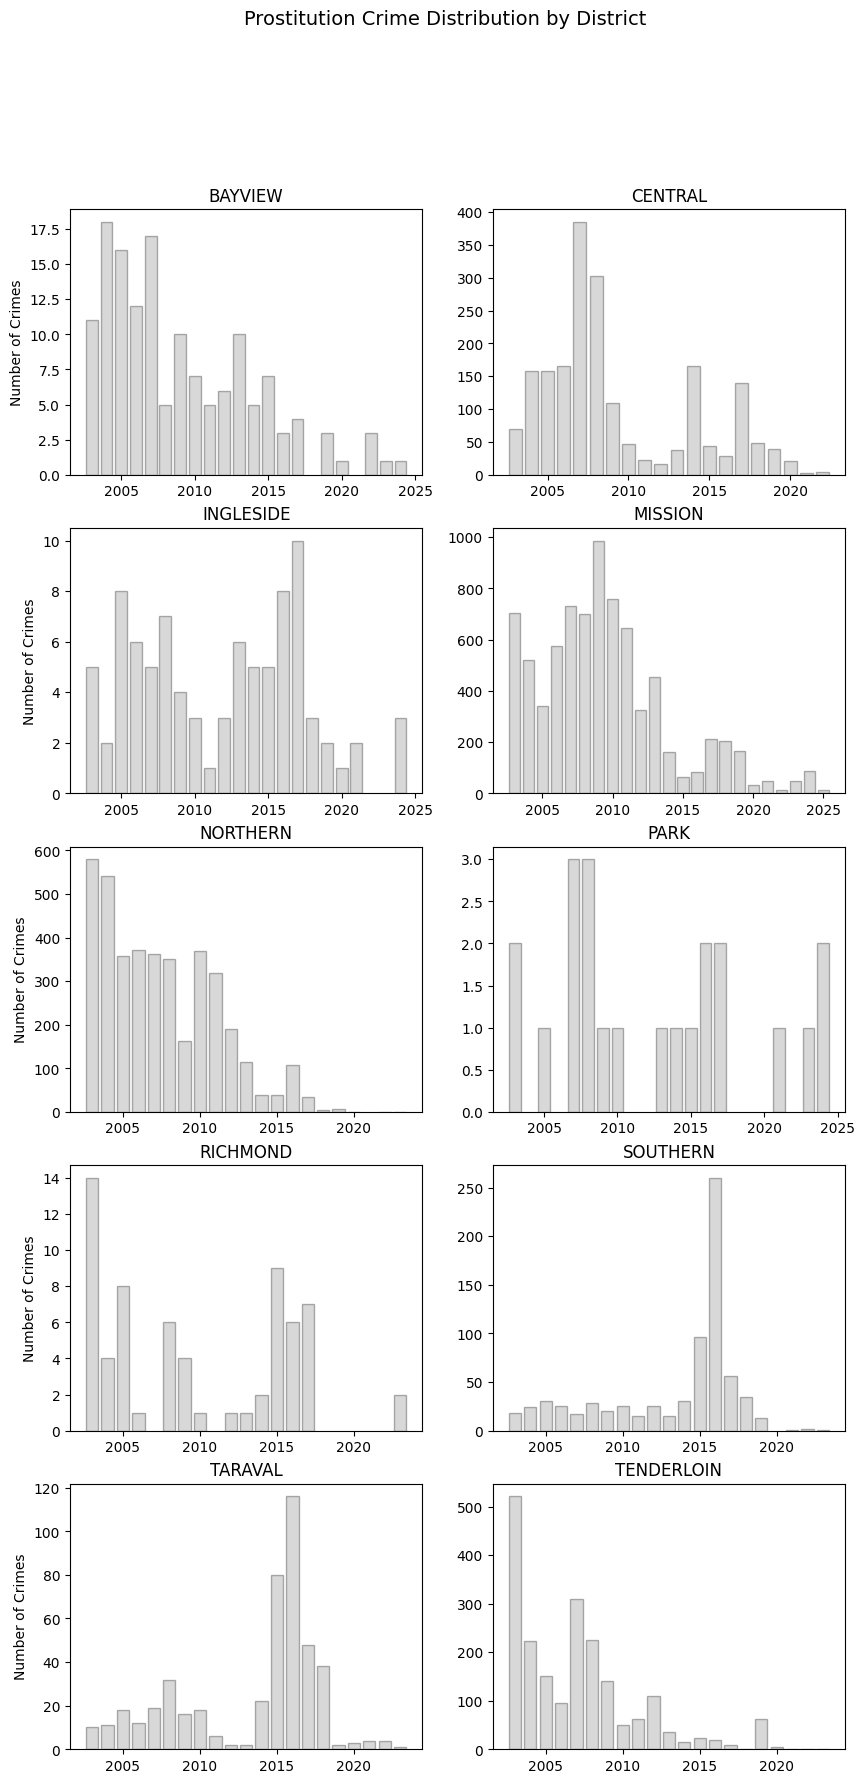

In [15]:
fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(10, 20))
fig.suptitle('Prostitution Crime Distribution by District', fontsize=14)
for i, (district,ax) in enumerate(zip(allProstitution.index,ax.flatten())):
    prostitution_district = crime_data[(crime_data["Category"] == "PROSTITUTION") & (crime_data["PdDistrict"] == district)]
    prostitution_district = prostitution_district.groupby("Year").size()
    ax.bar(prostitution_district.index, prostitution_district.values, edgecolor='black', facecolor='gray', alpha=0.3)
    ax.set_title(district)
    if i % 2 == 0:
        ax.set_ylabel("Number of Crimes")


In [16]:
import folium
from folium.plugins import HeatMap
avg_lat = crime_data['Latitude'].mean()
avg_lon = crime_data['Longitude'].mean()
map_hooray = folium.Map(location=[avg_lat, avg_lon], zoom_start = 12)


df_prostitution = crime_data[crime_data['Category']=='PROSTITUTION']
df_prostitution = df_prostitution[['Latitude', 'Longitude']]
df_prostitution = df_prostitution.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in df_prostitution.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray




In [17]:
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap

avg_lat = crime_data['Latitude'].mean()
avg_lon = crime_data['Longitude'].mean()
map_hooray = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
print(crime_data.columns)

df_prostitution = crime_data[crime_data['Category']=='PROSTITUTION']
df_prostitution = df_prostitution[['Latitude', 'Longitude','Date']]
print(df_prostitution.iloc[0])
df_prostitution = df_prostitution.dropna(axis=0, subset=['Latitude','Longitude'])

# Convert dates to datetime objects
df_prostitution['Date'] = pd.to_datetime(df_prostitution['Date'])

# Group by month-year for time series visualization
df_prostitution['month_year'] = df_prostitution['Date'].dt.strftime('%Y-%m')
time_groups = df_prostitution.groupby('month_year')

# Create data for HeatMapWithTime
heat_data = []
time_index = []

for label, group in time_groups:
    heat_data.append([[row['Latitude'], row['Longitude']] for _, row in group.iterrows()])
    time_index.append(label)

# Create and display heatmap with time
hm = plugins.HeatMapWithTime(
    heat_data,
    index=time_index,
    auto_play=True,
    max_opacity=0.8
)
hm.add_to(map_hooray)

# Display the map
map_hooray

Index(['Category', 'PdDistrict', 'Longitude', 'Latitude', 'DateTime',
       'TimeOfDay', 'DayOfWeek', 'DayOfMonth', 'Month', 'Year', 'Date',
       'Time'],
      dtype='object')
Latitude      37.763634
Longitude    -122.41623
Date         2006-02-07
Name: 133, dtype: object
